In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv(r'C:\Users\w10\Downloads\Customer Churn.csv',encoding = 'unicode_escape')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Replacing blanks with 0 as tenure is 0 and no charges are recorded 
### Also converting data type from object to float

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking for null values

In [6]:
pd.isnull(df).sum().sum()

0

### Checking for duplicates

In [7]:
df["customerID"].duplicated().sum()

0

### Creating a function that converts 0 and 1 to yes/no for easier access

In [8]:
def conv(values):
    if values == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

### Creating a bar graph to show count of customers by churn

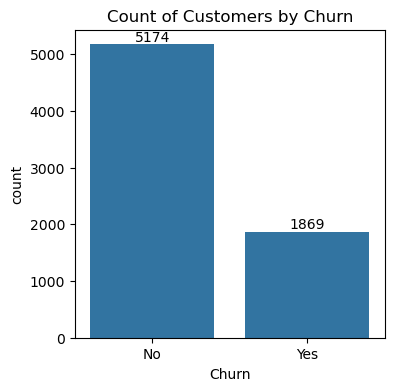

In [21]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

### Creating a pie chart to show Percentage of Churned Customers

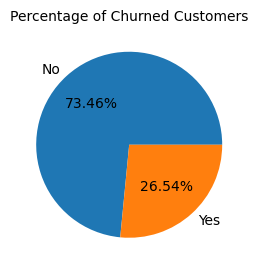

In [12]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

Conclusion : 26.54% customers have churned out.

### Creating a bar graph to show Churn by Gender

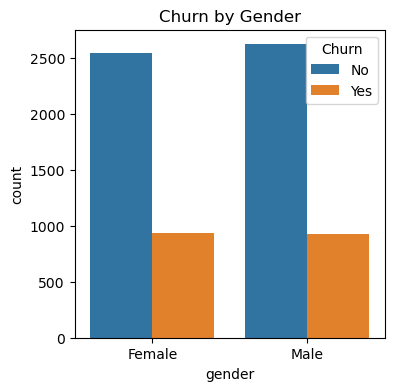

In [15]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df , hue = "Churn")
plt.title("Churn by Gender")
plt.show()

### Creating a Stacked bar chart to show % of Churn by SeniorCitizens

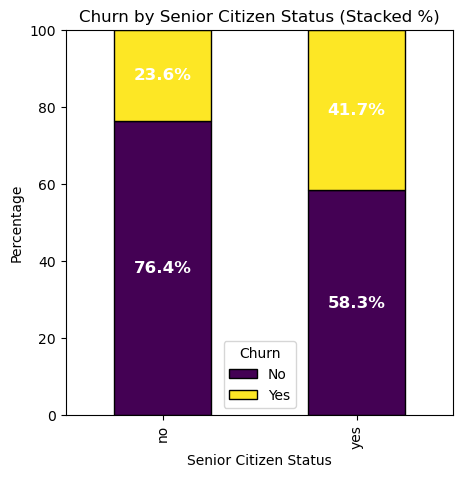

In [17]:
# Calculate counts and normalize to get percentages
crosstab = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
crosstab.plot(kind="bar", stacked=True, colormap="viridis", ax=ax, edgecolor="black")

# Add percentage labels
for i, (index, row) in enumerate(crosstab.iterrows()):
    bottom = 0
    for churn_status, percentage in row.items():
        ax.text(i, bottom + percentage / 2, f"{percentage:.1f}%", ha="center", va="center", color="white", fontsize=12, fontweight="bold")
        bottom += percentage  # Move text placement up

# Formatting
plt.title("Churn by Senior Citizen Status (Stacked %)")
plt.xlabel("Senior Citizen Status")
plt.ylabel("Percentage")

plt.legend(title="Churn", labels=["No", "Yes"])
plt.ylim(0, 100)

plt.show()


Conclusion : Comparatively a greater % of Senior citizens have churned out.

### Creating a Histogram to show the Tenure 

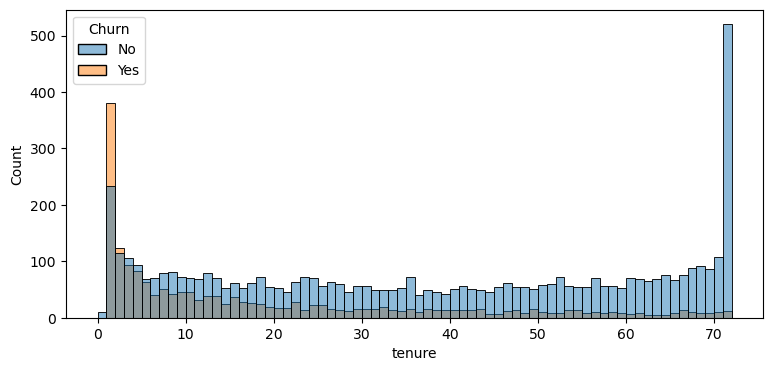

In [19]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df , bins = 72, hue = "Churn")
plt.show()

Conclusion : People using the services for a longer period of time stayed compared to those who just started using the services

### Creating a Bar graph to show the Count of Customers by Contract

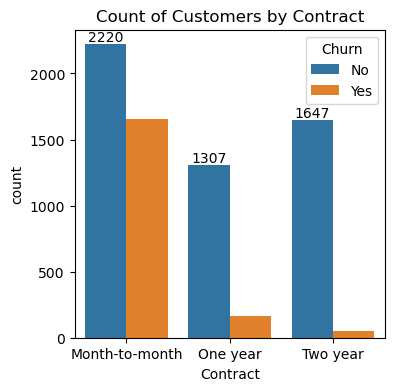

In [22]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

Conclusion : People who have taken Month-to-Month contract are more likely to Churn.

In [24]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Creating Subplots to show the count of services 

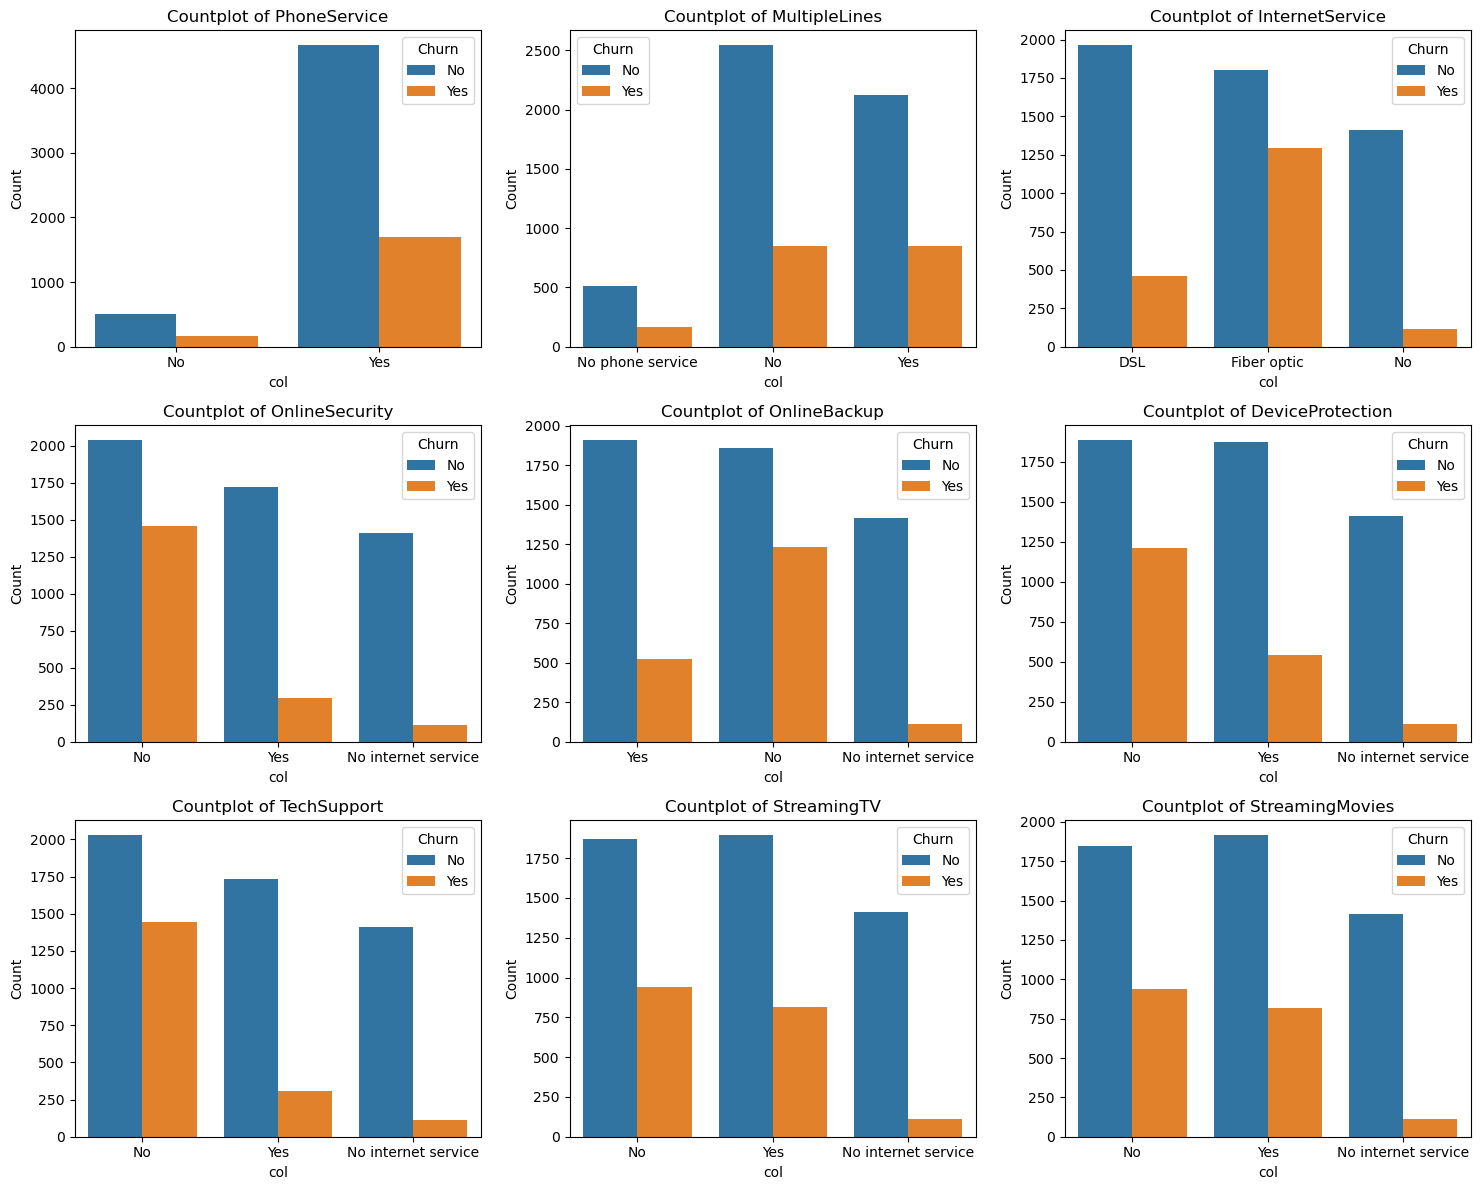

In [43]:
#list of columns for which we want to create count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

#number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols -1 )// n_cols

#create subplots
fig, axes = plt.subplots(n_rows,n_cols, figsize = (15,n_rows * 4))

#flatten the axes arrays
axes = axes.flatten()

#Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x= col, data = df, ax=axes[i],hue = df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('col')
    axes[i].set_ylabel('Count')

#Remove the empty subplots
for j in range(i + 1 ,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    


Conclusion: Majority of customers who do not churn tend to have services like PhoneService, InternetService and OnlineSecurity enabled.
For services like OnlineBackup,Techsupport and StreamingTV churn rates are noticeably higher when these services arenot used or unavailable.

### Creating a Countplot to show the Churned Customers by Payment method

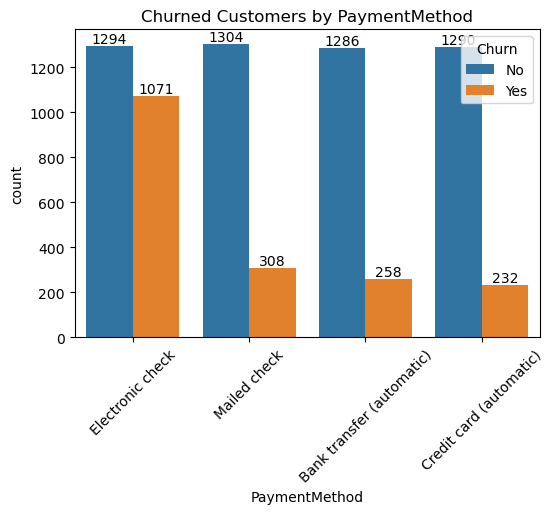

In [42]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customers by PaymentMethod")
plt.show()

Conclusion : Customers are more likely to churn if they are using Electronic method to pay.